In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib
from datetime import datetime, timedelta
import time
import dateutil
from pathlib import Path

In [333]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [334]:
PATH = r"C:\Users\kmfm1\BIproject\data"

In [335]:
customer_feedback = pd.read_csv(PATH + r"\customer_feedback.csv")
customers = pd.read_csv(PATH + r"\customers.csv")
delivery_performance = pd.read_csv(PATH + r"\delivery_performance.csv")
inventory = pd.read_csv(PATH + r"\inventory.csv")
inventoryNew = pd.read_csv(PATH + r"\inventoryNew.csv")
order_items = pd.read_csv(PATH + r"\order_items.csv")
orders = pd.read_csv(PATH + r"\orders.csv")
products = pd.read_csv(PATH + r"\products.csv")
marketing_performance = pd.read_csv(PATH + r"\marketing_performance.csv")
Business = pd.read_csv(PATH + r"\Business.csv")

In [336]:
marketing_performance.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [337]:
customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [338]:
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [339]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [340]:
order_items.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [341]:
delivery_performance.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [342]:
inventory.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [343]:
inventoryNew.head()

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


In [344]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [345]:
marketing_performance.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


## 1. 전처리

In [346]:
tables = {
    "customer_feedback": customer_feedback,
    "customers": customers,
    "delivery_performance": delivery_performance,
    "inventory": inventory,
    "inventoryNew": inventoryNew,
    "order_items": order_items,
    "orders": orders,
    "products": products,
    "marketing_performance": marketing_performance
}

for name, df in tables.items():
    print(f"\n==== {name} ====")
    print(df.isnull().sum())


==== customer_feedback ====
feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
dtype: int64

==== customers ====
customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64

==== delivery_performance ====
order_id                    0
delivery_partner_id         0
promised_time               0
actual_time                 0
delivery_time_minutes       0
distance_km                 0
delivery_status             0
reasons_if_delayed       1902
dtype: int64

==== inventory ====
product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

==== inventoryNew ====
product_id        0
date              0
stock_received    0
dama

In [347]:
delivery_performance["reasons_if_delayed"].value_counts(dropna=False)

reasons_if_delayed
Traffic    3098
NaN        1902
Name: count, dtype: int64

In [348]:
delivery_performance['reasons_if_delayed'] = delivery_performance['reasons_if_delayed'].fillna('On-Time')

In [349]:
delivery_performance["reasons_if_delayed"].value_counts(dropna=False)

reasons_if_delayed
Traffic    3098
On-Time    1902
Name: count, dtype: int64

In [350]:
orders.dtypes

order_id                    int64
customer_id                 int64
order_date                 object
promised_delivery_time     object
actual_delivery_time       object
delivery_status            object
order_total               float64
payment_method             object
delivery_partner_id         int64
store_id                    int64
dtype: object

In [351]:
print(orders.head())
print(delivery_performance.head())
print(customers.head())

     order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9

In [352]:
delivery_performance.dtypes

order_id                   int64
delivery_partner_id        int64
promised_time             object
actual_time               object
delivery_time_minutes    float64
distance_km              float64
delivery_status           object
reasons_if_delayed        object
dtype: object

In [ ]:

print(inventory.shape)
print(inventoryNew.shape)
print(products.shape)
print(customers.shape)
print(customer_feedback.shape)
print(delivery_performance.shape)
print(order_items.shape)
print(orders.shape)
print(marketing_performance.shape)

(75172, 4)
(18105, 4)
(268, 10)
(2500, 11)
(5000, 8)
(5000, 8)
(5000, 4)
(5000, 10)
(5400, 11)


In [354]:
# def to_dt(s, fmt=None):
#     return pd.to_datetime(s, format=fmt, errors="coerce")

In [355]:
# inventory["date"] = to_dt(inventory["date"], fmt="%d-%m-%Y")
# inventory["period_key"] = inventory["date"].dt.to_period("M").astype(str)
# inventory['date']

In [356]:
# inventoryNew["date"] = to_dt(inventoryNew["date"], fmt="%b-%y")
# inventoryNew["period_key"] = inventoryNew["date"].dt.to_period("M").astype(str)

In [357]:
product_inventory = (
    order_items[["order_id", "product_id", "quantity", "unit_price"]]
    .merge(
        products[["product_id", "category", "price", "shelf_life_days"]],
        on="product_id", how="left", validate="m:1"
    )
    .merge(
        orders[["order_id", "store_id", "order_date"]],
        on="order_id", how="left", validate="m:1"
    )
    .merge(
        customer_feedback[[
            "order_id", "feedback_id", "rating",
            "feedback_category", "sentiment", "feedback_date"
        ]],
        on="order_id", how="left", validate="m:1"
    )
)
product_inventory.head()

,order_id,product_id,quantity,unit_price,category,price,shelf_life_days,store_id,order_date,feedback_id,rating,feedback_category,sentiment,feedback_date
0,1961864118,642612,3,517.03,Pet Care,517.03,365,4771,2024-07-17 08:34:01,2234710,4,Delivery,Neutral,2024-07-17
1,1549769649,378676,1,881.42,Cold Drinks & Juices,881.42,180,7534,2024-05-28 13:14:29,5450964,3,App Experience,Negative,2024-05-28
2,9185164487,741341,2,923.84,Dairy & Breakfast,923.84,7,9886,2024-09-23 13:07:12,482108,3,App Experience,Neutral,2024-09-23
3,9644738826,561860,1,874.78,Cold Drinks & Juices,874.78,180,7917,2023-11-24 16:16:56,4823104,4,App Experience,Neutral,2023-11-24
4,5427684290,602241,2,976.55,Snacks & Munchies,976.55,90,2741,2023-11-20 05:00:39,3537464,3,Delivery,Negative,2023-11-20


In [358]:
product_inventory = ( order_items .merge(products, on="product_id", how="left", validate="m:1") \
    .merge( orders[[ "order_id", "customer_id", "store_id", "order_date", "delivery_status", "order_total", "payment_method", "delivery_partner_id" ]], on="order_id", how="left", validate="m:1" ) 
    .merge( customer_feedback[[ "order_id", "feedback_id", "rating", "feedback_category", "sentiment", "feedback_date", "feedback_text" ]], on="order_id", how="left", validate="m:1" ) )
product_inventory

,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,...,delivery_status,order_total,payment_method,delivery_partner_id,feedback_id,rating,feedback_category,sentiment,feedback_date,feedback_text
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,...,On Time,3197.07,Cash,63230,2234710,4,Delivery,Neutral,2024-07-17,"It was okay, nothing special."
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,...,On Time,976.55,Cash,14983,5450964,3,App Experience,Negative,2024-05-28,The order was incorrect.
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,...,On Time,839.05,UPI,39859,482108,3,App Experience,Neutral,2024-09-23,"It was okay, nothing special."
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,...,On Time,440.23,Card,61497,4823104,4,App Experience,Neutral,2023-11-24,The product met my expectations.
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,...,On Time,2526.68,Cash,84315,3537464,3,Delivery,Negative,2023-11-20,Product was damaged during delivery.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,475.04,791.73,40.0,...,On Time,1132.33,Cash,90914,9024060,3,Product Quality,Negative,2023-12-25,Taste was not as expected.
4996,8340761903,124290,2,39.65,Lotion,Personal Care,Sachdev Group,39.65,61.00,35.0,...,On Time,2372.01,Cash,27952,4715968,3,Product Quality,Neutral,2023-11-27,"Average experience, could improve."
4997,5936301790,491314,3,973.44,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,...,On Time,3158.35,Cash,9590,9621021,4,App Experience,Neutral,2024-06-21,"Average experience, could improve."
4998,5710579377,319388,2,657.80,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,657.80,939.71,30.0,...,On Time,1918.92,UPI,29940,1134095,4,Delivery,Neutral,2024-06-06,"Average experience, could improve."


In [359]:
product_inventory.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level', 'customer_id',
       'store_id', 'order_date', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'feedback_id', 'rating',
       'feedback_category', 'sentiment', 'feedback_date', 'feedback_text'],
      dtype='object')

In [360]:
product_inventory.isnull().sum()

order_id               0
product_id             0
quantity               0
unit_price             0
product_name           0
category               0
brand                  0
price                  0
mrp                    0
margin_percentage      0
shelf_life_days        0
min_stock_level        0
max_stock_level        0
customer_id            0
store_id               0
order_date             0
delivery_status        0
order_total            0
payment_method         0
delivery_partner_id    0
feedback_id            0
rating                 0
feedback_category      0
sentiment              0
feedback_date          0
feedback_text          0
dtype: int64

In [361]:
inventoryNew.head()

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


In [362]:
inventory.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [363]:
prod = products[[
    "product_id",
    "category",
    "price",
    "mrp",
    "margin_percentage"
]].copy()
prod.head()

,product_id,category,price,mrp,margin_percentage
0,153019,Fruits & Vegetables,947.95,1263.93,25.0
1,11422,Fruits & Vegetables,127.16,169.55,25.0
2,669378,Fruits & Vegetables,212.14,282.85,25.0
3,848226,Fruits & Vegetables,209.59,279.45,25.0
4,890623,Fruits & Vegetables,354.52,472.69,25.0


In [364]:
inv = (
    inventory[["product_id", "stock_received", "damaged_stock"]]
    .merge(prod, on="product_id", how="left", validate="m:1")
)
inv.head()

,product_id,stock_received,damaged_stock,category,price,mrp,margin_percentage
0,153019,4,2,Fruits & Vegetables,947.95,1263.93,25.0
1,848226,4,2,Fruits & Vegetables,209.59,279.45,25.0
2,965755,1,0,Fruits & Vegetables,532.57,710.09,25.0
3,39154,4,0,Fruits & Vegetables,946.86,1262.48,25.0
4,34186,3,2,Fruits & Vegetables,925.65,1234.20,25.0


## 2. 파생변수

### inventory 테이블 파생변수

In [365]:
# damage 비율
inv["damaged_rate"] = (
    inv["damaged_stock"] /inv["stock_received"])

In [366]:
# 전체 매출
inv["gross_value"] = inv["stock_received"] * inv["price"]

In [367]:
# 마진
inv["gross_margin"] = inv["stock_received"] * inv["price"] * (inv["margin_percentage"] / 100)

In [368]:
# 손해액
inv["damage_loss_value"] = inv["damaged_stock"] * inv["price"]

In [369]:
# 손해마진
inv["damage_loss_margin"] = inv["damaged_stock"] * inv["price"] * (inv["margin_percentage"] / 100)
inv.head()

,product_id,stock_received,damaged_stock,category,price,mrp,margin_percentage,damaged_rate,gross_value,gross_margin,damage_loss_value,damage_loss_margin
0,153019,4,2,Fruits & Vegetables,947.95,1263.93,25.0,0.500000,3791.80,947.9500,1895.90,473.975
1,848226,4,2,Fruits & Vegetables,209.59,279.45,25.0,0.500000,838.36,209.5900,419.18,104.795
2,965755,1,0,Fruits & Vegetables,532.57,710.09,25.0,0.000000,532.57,133.1425,0.00,0.000
3,39154,4,0,Fruits & Vegetables,946.86,1262.48,25.0,0.000000,3787.44,946.8600,0.00,0.000
4,34186,3,2,Fruits & Vegetables,925.65,1234.20,25.0,0.666667,2776.95,694.2375,1851.30,462.825


In [370]:
# 카테고리 집계 (inventory 기준)
inv_category = (
    inv
    .groupby("category", as_index=False)
    .agg(
        stock_received=("stock_received", "sum"),
        damaged_stock=("damaged_stock", "sum"),
        gross_value=("gross_value", "mean"),
        damaged_rate = ("damaged_rate", 'mean'),
        gross_margin=("gross_margin", "mean"),
        damage_loss_value=("damage_loss_value", "mean"),
        damage_loss_margin=("damage_loss_margin", "mean")
    ).round(2)
)

inv_category["damaged_rate"] = (
    inv_category["damaged_stock"] /
    inv_category["stock_received"].replace(0, np.nan)
).fillna(0).round(2)


inv_category["damaged_rate"] = (
    inv_category["damaged_stock"] /
    inv_category["stock_received"]
).round(2)

inv_category["loss_rate_value"] = (
    inv_category["damage_loss_value"] /
    inv_category["gross_value"]
).round(2)

inv_category["loss_rate_margin"] = (
    inv_category["damage_loss_margin"] /
    inv_category["gross_margin"]
).round(2)
inv_category

,category,stock_received,damaged_stock,gross_value,damaged_rate,gross_margin,damage_loss_value,damage_loss_margin,loss_rate_value,loss_rate_margin
0,Baby Care,9700,4828,1018.05,0.50,305.42,514.82,154.45,0.51,0.51
1,Cold Drinks & Juices,11107,6604,941.03,0.59,282.31,561.61,168.48,0.60,0.60
2,Dairy & Breakfast,14873,8890,1082.04,0.60,216.41,637.64,127.53,0.59,0.59
3,Fruits & Vegetables,13670,8120,1036.74,0.59,259.19,622.66,155.67,0.60,0.60
4,Grocery & Staples,15036,7144,832.66,0.48,124.90,387.17,58.08,0.46,0.47
5,Household Care,12034,8210,646.13,0.68,161.53,451.11,112.78,0.70,0.70
6,Instant & Frozen Food,10183,5910,781.98,0.58,312.79,459.14,183.65,0.59,0.59
7,Personal Care,12239,7524,830.34,0.61,290.62,499.20,174.72,0.60,0.60
8,Pet Care,17521,7528,1210.94,0.43,423.83,529.94,185.48,0.44,0.44
9,Pharmacy,17318,7366,1308.84,0.43,261.77,574.92,114.98,0.44,0.44


In [371]:
sort_damaged_rate = (inv_category.sort_values("damaged_rate", ascending=False).reset_index(drop=True))
sort_damaged_rate

,category,stock_received,damaged_stock,gross_value,damaged_rate,gross_margin,damage_loss_value,damage_loss_margin,loss_rate_value,loss_rate_margin
0,Household Care,12034,8210,646.13,0.68,161.53,451.11,112.78,0.70,0.70
1,Personal Care,12239,7524,830.34,0.61,290.62,499.20,174.72,0.60,0.60
2,Dairy & Breakfast,14873,8890,1082.04,0.60,216.41,637.64,127.53,0.59,0.59
3,Snacks & Munchies,13845,8144,798.69,0.59,279.54,467.79,163.73,0.59,0.59
4,Cold Drinks & Juices,11107,6604,941.03,0.59,282.31,561.61,168.48,0.60,0.60
5,Fruits & Vegetables,13670,8120,1036.74,0.59,259.19,622.66,155.67,0.60,0.60
6,Instant & Frozen Food,10183,5910,781.98,0.58,312.79,459.14,183.65,0.59,0.59
7,Baby Care,9700,4828,1018.05,0.50,305.42,514.82,154.45,0.51,0.51
8,Grocery & Staples,15036,7144,832.66,0.48,124.90,387.17,58.08,0.46,0.47
9,Pet Care,17521,7528,1210.94,0.43,423.83,529.94,185.48,0.44,0.44


In [372]:
sort_damage_value = (inv_category.sort_values("damage_loss_value", ascending=False).reset_index(drop=True))
sort_damage_value

,category,stock_received,damaged_stock,gross_value,damaged_rate,gross_margin,damage_loss_value,damage_loss_margin,loss_rate_value,loss_rate_margin
0,Dairy & Breakfast,14873,8890,1082.04,0.60,216.41,637.64,127.53,0.59,0.59
1,Fruits & Vegetables,13670,8120,1036.74,0.59,259.19,622.66,155.67,0.60,0.60
2,Pharmacy,17318,7366,1308.84,0.43,261.77,574.92,114.98,0.44,0.44
3,Cold Drinks & Juices,11107,6604,941.03,0.59,282.31,561.61,168.48,0.60,0.60
4,Pet Care,17521,7528,1210.94,0.43,423.83,529.94,185.48,0.44,0.44
5,Baby Care,9700,4828,1018.05,0.50,305.42,514.82,154.45,0.51,0.51
6,Personal Care,12239,7524,830.34,0.61,290.62,499.20,174.72,0.60,0.60
7,Snacks & Munchies,13845,8144,798.69,0.59,279.54,467.79,163.73,0.59,0.59
8,Instant & Frozen Food,10183,5910,781.98,0.58,312.79,459.14,183.65,0.59,0.59
9,Household Care,12034,8210,646.13,0.68,161.53,451.11,112.78,0.70,0.70


### inventoryNew 파생변수 (신규 입고)

In [373]:

inv_new = (
    inventoryNew[["product_id", "stock_received", "damaged_stock"]]
    .merge(prod, on="product_id", how="left", validate="m:1")
)

# 상품 단위 파생변수
inv_new["damaged_rate"] = (
    inv_new["damaged_stock"] /
    inv_new["stock_received"].replace(0, np.nan)
).fillna(0)

inv_new["gross_value"] = inv_new["stock_received"] * inv_new["price"]
inv_new["gross_margin"] = inv_new["stock_received"] * inv_new["price"] * (inv_new["margin_percentage"] / 100)

inv_new["damage_loss_value"] = inv_new["damaged_stock"] * inv_new["price"]
inv_new["damage_loss_margin"] = inv_new["damaged_stock"] * inv_new["price"] * (inv_new["margin_percentage"] / 100)

# 카테고리 집계 (inventoryNew 기준)
inv_new_category = (
    inv_new
    .groupby("category", as_index=False)
    .agg(
        stock_received=("stock_received", "sum"),
        damaged_stock=("damaged_stock", "sum"),
        gross_value=("gross_value", "mean"),
        gross_margin=("gross_margin", "mean"),
        damage_loss_value=("damage_loss_value", "mean"),
        damage_loss_margin=("damage_loss_margin", "mean")
    )
).round(2)

inv_new_category["damaged_rate"] = (
    inv_new_category["damaged_stock"] /
    inv_new_category["stock_received"]
).round(2)

inv_new_category["loss_rate_value"] = (
    inv_new_category["damage_loss_value"] /
    inv_new_category["gross_value"]
).round(2)


inv_new_category["loss_rate_margin"] = (
    inv_new_category["damage_loss_margin"] /
    inv_new_category["gross_margin"]
).round(2)
inv_new_category

,category,stock_received,damaged_stock,gross_value,gross_margin,damage_loss_value,damage_loss_margin,damaged_rate,loss_rate_value,loss_rate_margin
0,Baby Care,1353,51,844.88,253.47,28.79,8.64,0.04,0.03,0.03
1,Cold Drinks & Juices,2426,91,791.98,237.59,26.59,7.98,0.04,0.03,0.03
2,Dairy & Breakfast,3263,125,900.73,180.15,35.53,7.11,0.04,0.04,0.04
3,Fruits & Vegetables,3010,114,881.48,220.37,34.32,8.58,0.04,0.04,0.04
4,Grocery & Staples,2869,128,615.31,92.30,27.70,4.15,0.04,0.05,0.04
5,Household Care,2559,119,628.45,157.11,27.98,6.99,0.05,0.04,0.04
6,Instant & Frozen Food,2246,85,671.84,268.74,28.89,11.56,0.04,0.04,0.04
7,Personal Care,2511,97,712.13,249.24,23.24,8.14,0.04,0.03,0.03
8,Pet Care,2712,106,877.29,307.05,34.65,12.13,0.04,0.04,0.04
9,Pharmacy,2835,88,976.75,195.35,29.92,5.98,0.03,0.03,0.03


In [374]:
sort_damaged_rate_new = (inv_new_category.sort_values("damaged_rate", ascending=False).reset_index(drop=True))
sort_damaged_rate_new

,category,stock_received,damaged_stock,gross_value,gross_margin,damage_loss_value,damage_loss_margin,damaged_rate,loss_rate_value,loss_rate_margin
0,Household Care,2559,119,628.45,157.11,27.98,6.99,0.05,0.04,0.04
1,Cold Drinks & Juices,2426,91,791.98,237.59,26.59,7.98,0.04,0.03,0.03
2,Baby Care,1353,51,844.88,253.47,28.79,8.64,0.04,0.03,0.03
3,Dairy & Breakfast,3263,125,900.73,180.15,35.53,7.11,0.04,0.04,0.04
4,Fruits & Vegetables,3010,114,881.48,220.37,34.32,8.58,0.04,0.04,0.04
5,Grocery & Staples,2869,128,615.31,92.30,27.70,4.15,0.04,0.05,0.04
6,Instant & Frozen Food,2246,85,671.84,268.74,28.89,11.56,0.04,0.04,0.04
7,Personal Care,2511,97,712.13,249.24,23.24,8.14,0.04,0.03,0.03
8,Pet Care,2712,106,877.29,307.05,34.65,12.13,0.04,0.04,0.04
9,Snacks & Munchies,2995,105,658.29,230.40,22.97,8.04,0.04,0.03,0.03


In [375]:
sort_damage_value_new = (inv_new_category.sort_values("damage_loss_value", ascending=False).reset_index(drop=True))
sort_damage_value_new

,category,stock_received,damaged_stock,gross_value,gross_margin,damage_loss_value,damage_loss_margin,damaged_rate,loss_rate_value,loss_rate_margin
0,Dairy & Breakfast,3263,125,900.73,180.15,35.53,7.11,0.04,0.04,0.04
1,Pet Care,2712,106,877.29,307.05,34.65,12.13,0.04,0.04,0.04
2,Fruits & Vegetables,3010,114,881.48,220.37,34.32,8.58,0.04,0.04,0.04
3,Pharmacy,2835,88,976.75,195.35,29.92,5.98,0.03,0.03,0.03
4,Instant & Frozen Food,2246,85,671.84,268.74,28.89,11.56,0.04,0.04,0.04
5,Baby Care,1353,51,844.88,253.47,28.79,8.64,0.04,0.03,0.03
6,Household Care,2559,119,628.45,157.11,27.98,6.99,0.05,0.04,0.04
7,Grocery & Staples,2869,128,615.31,92.30,27.70,4.15,0.04,0.05,0.04
8,Cold Drinks & Juices,2426,91,791.98,237.59,26.59,7.98,0.04,0.03,0.03
9,Personal Care,2511,97,712.13,249.24,23.24,8.14,0.04,0.03,0.03


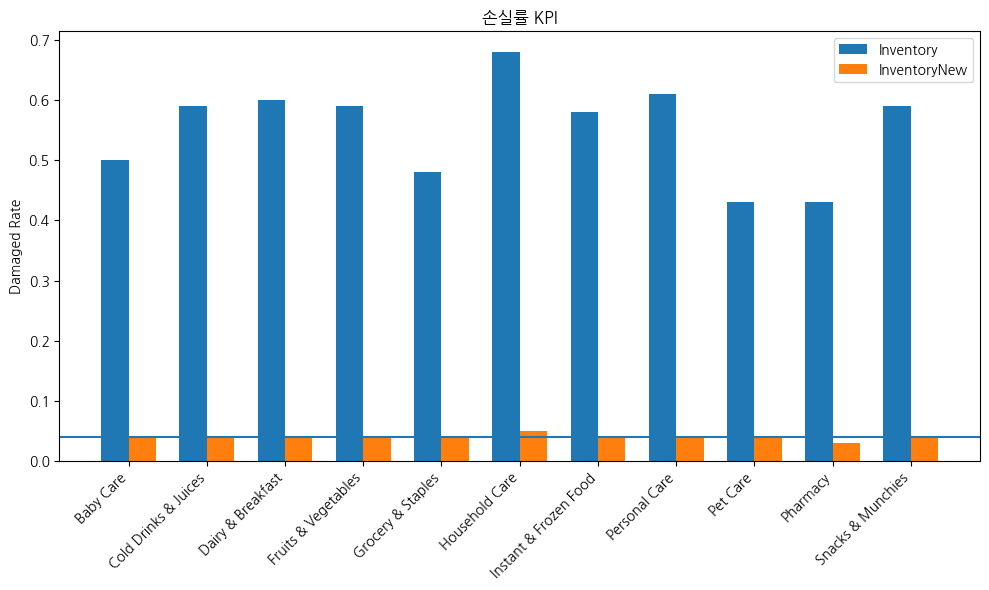

In [376]:
# 두 테이블 병합
compare_rate = (
    inv_category[["category","damaged_rate"]]
    .merge(
        inv_new_category[["category","damaged_rate"]],
        on="category",
        suffixes=("_old","_new")
    )
)

x = np.arange(len(compare_rate))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, compare_rate["damaged_rate_old"], width, label="Inventory")
plt.bar(x + width/2, compare_rate["damaged_rate_new"], width, label="InventoryNew")

plt.axhline(0.04)  # KPI 기준선

plt.xticks(x, compare_rate["category"], rotation=45, ha="right")
plt.ylabel("Damaged Rate")
plt.title("손실률 KPI")
plt.legend()
plt.tight_layout()
plt.show()

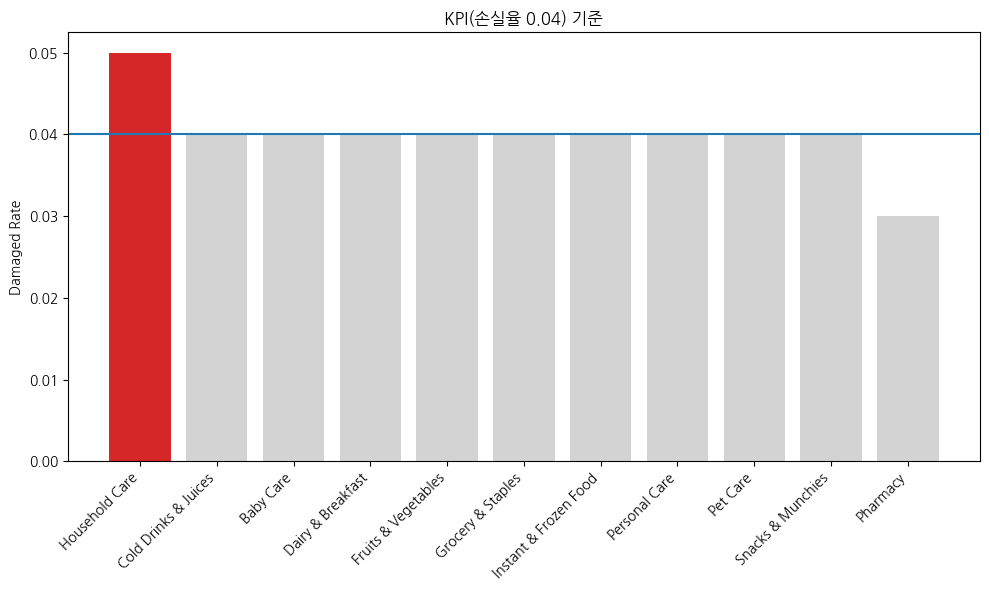

In [377]:
df = inv_new_category.sort_values("damaged_rate", ascending=False).reset_index(drop=True)

threshold = 0.04

colors = [
    "tab:red" if rate > threshold else "lightgray"
    for rate in df["damaged_rate"]
]

plt.figure(figsize=(10,6))
plt.bar(df["category"], df["damaged_rate"], color=colors)

plt.axhline(threshold)  # KPI 기준선 0.04
plt.xticks(rotation=45, ha="right")
plt.ylabel("Damaged Rate")
plt.title("KPI(손실율 0.04) 기준")
plt.tight_layout()
plt.show()

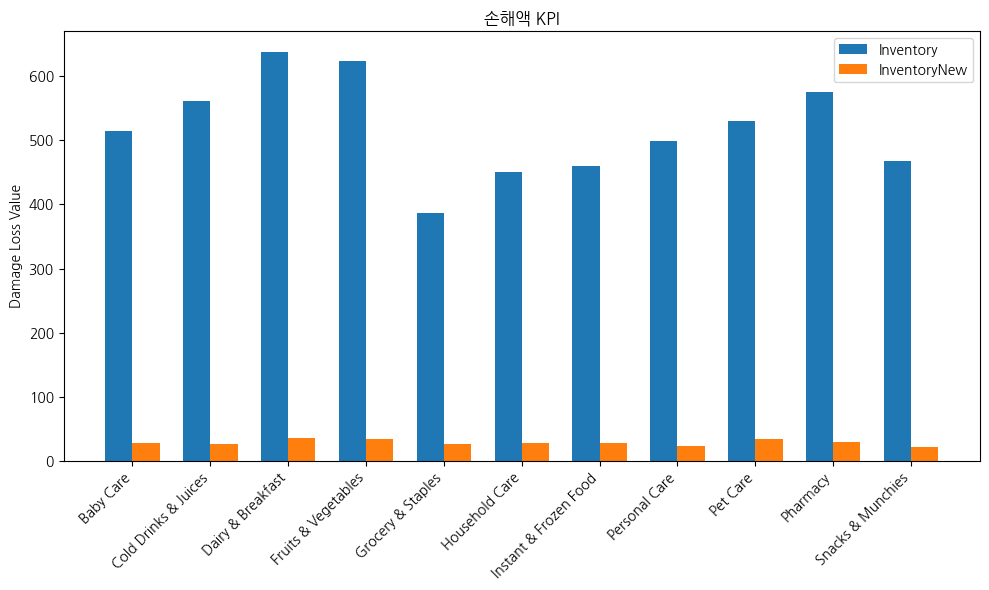

In [378]:
compare_loss = (
    inv_category[["category","damage_loss_value"]]
    .merge(
        inv_new_category[["category","damage_loss_value"]],
        on="category",
        suffixes=("_old","_new")
    )
)

plt.figure(figsize=(10,6))
plt.bar(x - width/2, compare_loss["damage_loss_value_old"], width, label="Inventory")
plt.bar(x + width/2, compare_loss["damage_loss_value_new"], width, label="InventoryNew")

plt.xticks(x, compare_loss["category"], rotation=45, ha="right")
plt.ylabel("Damage Loss Value")
plt.title("손해액 KPI")
plt.legend()
plt.tight_layout()
plt.show()

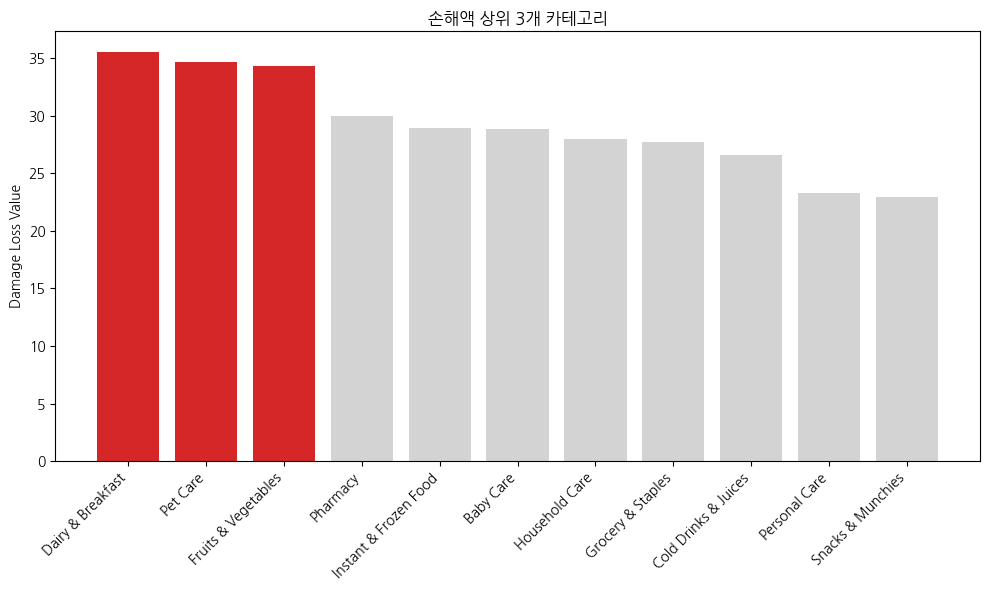

In [379]:
df_loss = inv_new_category.sort_values("damage_loss_value", ascending=False).reset_index(drop=True)

top2_categories = df_loss["category"].head(3).tolist()

colors = [
    "tab:red" if cat in top2_categories else "lightgray"
    for cat in df_loss["category"]
]

plt.figure(figsize=(10,6))
plt.bar(df_loss["category"], df_loss["damage_loss_value"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Damage Loss Value")
plt.title("손해액 상위 3개 카테고리")
plt.tight_layout()
plt.show()

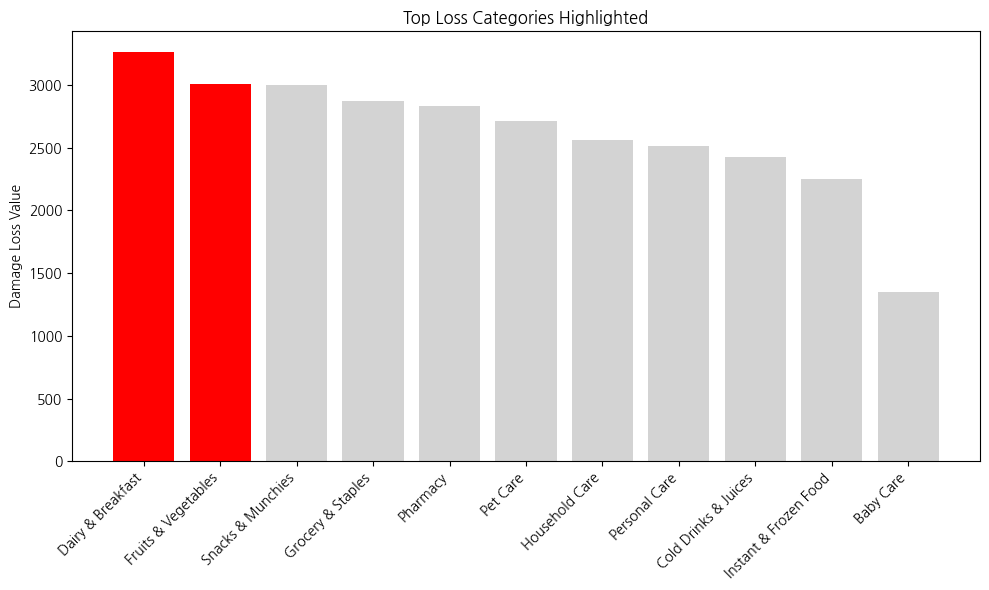

In [380]:
df = inv_new_category.sort_values("stock_received", ascending=False).reset_index(drop=True)

# 강조할 카테고리
highlight_categories = [
    "Dairy & Breakfast",
    "Fruits & Vegetables",
]

# 색상 지정
colors = [
    "red" if cat in highlight_categories else "lightgray"
    for cat in df["category"]
]

# 시각화
plt.figure(figsize=(10,6))
plt.bar(df["category"], df["stock_received"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Damage Loss Value")
plt.title("Top Loss Categories Highlighted")
plt.tight_layout()
plt.show()

In [381]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


# 3. 최종 데이터 테이블(BI 툴 업로드용)

inventory_agg = (
    inventory
    .groupby("product_id")
    .agg({
        "stock_received": "sum",
        "damaged_stock": "sum"
    })
    .reset_index()
)

In [382]:
import pandas as pd
import numpy as np

# 날짜 타입(있으면)
if 'order_date' in orders.columns:
    orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')

# 숫자 타입(있으면)
for df, cols in [
    (order_items, ['quantity', 'unit_price']),
    (products, ['mrp', 'price'])
]:
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

# 1) order_id 단위 테이블들은 "order_id 1행"으로 정리
orders_1 = orders.drop_duplicates('order_id', keep='last')

dp_1 = delivery_performance.drop_duplicates('order_id', keep='last') \
    if ('delivery_performance' in globals() and 'order_id' in delivery_performance.columns) else None

fb_1 = customer_feedback.drop_duplicates('order_id', keep='last') \
    if ('customer_feedback' in globals() and 'order_id' in customer_feedback.columns) else None

# 2) fact_sales = order_items 기준으로 ERD 키 조인
fact_sales = (
    order_items
    .merge(orders_1, on='order_id', how='left')
    .merge(products, on='product_id', how='left')
)

# (선택) 배송/리뷰 붙이기: order_id 기준 1행화 했으니 안전
if dp_1 is not None:
    fact_sales = fact_sales.merge(dp_1, on='order_id', how='left')

if fb_1 is not None:
    fact_sales = fact_sales.merge(fb_1, on='order_id', how='left')

print("fact_sales:", fact_sales.shape, "| unique orders:", fact_sales['order_id'].nunique())
fact_sales

fact_sales: (5000, 36) | unique orders: 5000


,order_id,product_id,quantity,unit_price,customer_id_x,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,...,distance_km,delivery_status_y,reasons_if_delayed,feedback_id,customer_id_y,rating,feedback_text,feedback_category,sentiment,feedback_date
0,1961864118,642612,3,517.03,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,...,0.96,On Time,On-Time,2234710,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,1549769649,378676,1,881.42,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,...,0.98,On Time,Traffic,5450964,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,9185164487,741341,2,923.84,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,...,3.83,On Time,Traffic,482108,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,9644738826,561860,1,874.78,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,...,2.76,On Time,On-Time,4823104,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,5427684290,602241,2,976.55,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,...,2.63,On Time,Traffic,3537464,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,...,1.86,On Time,Traffic,9024060,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,8340761903,124290,2,39.65,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,...,3.31,On Time,On-Time,4715968,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,5936301790,491314,3,973.44,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,...,2.44,On Time,Traffic,9621021,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,5710579377,319388,2,657.80,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,...,1.76,On Time,On-Time,1134095,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


In [383]:
# 1) 재고 테이블 선택 (단순 운영: 하나만)
inv = inventoryNew.copy()  # <- 필요시 inventory로 변경

# 2) 키 기준 중복 제거 (product_id + date가 있으면 그 기준)
if 'date' in inv.columns:
    inv['date'] = pd.to_datetime(inv['date'], errors='coerce')

key_cols = [c for c in ['product_id', 'date'] if c in inv.columns]
if key_cols:
    inv_1 = inv.drop_duplicates(key_cols, keep='last')
else:
    inv_1 = inv.drop_duplicates('product_id', keep='last')  # 최후 fallback

# 3) products 붙여서 카테고리/임계치 가져오기
fact_inventory = inv_1.merge(products, on='product_id', how='left')

# 4) 재고 효율성(“묶인 기간”)은 현재 컬럼만으론 '입고일'이 없어서,
# snapshot 기준 경과일(inventory_age_days)로 대체하는 게 안전
if 'date' in fact_inventory.columns and fact_inventory['date'].notna().any():
    as_of = fact_inventory['date'].max()
    fact_inventory['inventory_age_days'] = (as_of - fact_inventory['date']).dt.days
else:
    fact_inventory['inventory_age_days'] = np.nan

print("fact_inventory:", fact_inventory.shape, "| unique products:", fact_inventory['product_id'].nunique())

fact_inventory: (268, 14) | unique products: 268


C:\Users\kmfm1\AppData\Local\Temp\ipykernel_17752\4235614146.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inv['date'] = pd.to_datetime(inv['date'], errors='coerce')


In [384]:
if 'order_date' in fact_sales.columns and fact_sales['order_date'].notna().any():
    max_dt = fact_sales['order_date'].max()
    cutoff = max_dt - pd.Timedelta(days=90)

    sold_90 = (fact_sales.loc[fact_sales['order_date'] >= cutoff]
               .groupby('product_id', as_index=False)['quantity']
               .sum()
               .rename(columns={'quantity': 'sold_qty_last_90d'}))
else:
    sold_90 = pd.DataFrame({'product_id': fact_inventory['product_id'].unique(),
                            'sold_qty_last_90d': 0})

fact_inventory = fact_inventory.merge(sold_90, on='product_id', how='left')
fact_inventory['sold_qty_last_90d'] = fact_inventory['sold_qty_last_90d'].fillna(0)
fact_inventory['dead_stock_flag'] = (fact_inventory['sold_qty_last_90d'] == 0).astype(int)
if 'stock_received' in fact_inventory.columns and 'min_stock_level' in fact_inventory.columns:
    fact_inventory['sold_out'] = (fact_inventory['stock_received'] <= fact_inventory['min_stock_level']).astype(int)

In [385]:
fact_inventory.drop(columns=['inventory_age_days','sold_qty_last_90d', 'dead_stock_flag', 'sold_out'], axis=1, inplace=True)

In [386]:
fact_inventory.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level'],
      dtype='object')

In [387]:
# fact_sales.to_csv("BI.csv", index=False)

In [388]:
# fact_inventory.to_csv("inv.csv", index=False)

In [389]:
# BI = pd.read_csv(PATH + r'\BI.csv')

In [390]:
# BI.head()

In [391]:
# BI.drop(columns= 
#         ['promised_delivery_time', 'actual_delivery_time', 'delivery_status_x', 
#          'payment_method', 'delivery_partner_id_x','store_id', 'delivery_partner_id_y',
#          'promised_time', 'actual_time', 'delivery_time_minutes', 'distance_km', 'delivery_status_y', 
#          'reasons_if_delayed', 'customer_id_y', 'feedback_text'], axis=1, inplace=True)

In [392]:
# BI = BI.rename(columns= {'customer_id_x':'customer_id'})

In [393]:
# BI.head()

In [394]:
# BI.to_csv('Business.csv', index=False)

In [395]:
Business = pd.read_csv(PATH + r'\Business.csv')

In [396]:
Business = Business.merge(
    customers[['customer_id',
               'area',
               'registration_date',
               'customer_segment',
               'total_orders',
               'avg_order_value']],
    on='customer_id',
    how='left'
)

In [397]:
Business.isnull().sum()

order_id               0
product_id             0
quantity               0
unit_price             0
customer_id            0
order_date             0
order_total            0
product_name           0
category               0
brand                  0
price                  0
mrp                    0
margin_percentage      0
shelf_life_days        0
min_stock_level        0
max_stock_level        0
feedback_id            0
rating                 0
feedback_category      0
sentiment              0
feedback_date          0
area_x                 0
registration_date_x    0
customer_segment_x     0
total_orders_x         0
avg_order_value_x      0
area_y                 0
registration_date_y    0
customer_segment_y     0
total_orders_y         0
avg_order_value_y      0
dtype: int64

In [398]:
# Business.to_csv('Business.csv', index=False)

In [399]:
Business.head()

,order_id,product_id,quantity,unit_price,customer_id,order_date,order_total,product_name,category,brand,...,area_x,registration_date_x,customer_segment_x,total_orders_x,avg_order_value_x,area_y,registration_date_y,customer_segment_y,total_orders_y,avg_order_value_y
0,1961864118,642612,3,517.03,30065862,2024-07-17 08:34:01,3197.07,Pet Treats,Pet Care,Pillay-Ahuja,...,Allahabad,2024-09-02,Regular,13,749.95,Allahabad,2024-09-02,Regular,13,749.95
1,1549769649,378676,1,881.42,9573071,2024-05-28 13:14:29,976.55,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,...,Thrissur,2023-11-07,New,5,958.06,Thrissur,2023-11-07,New,5,958.06
2,9185164487,741341,2,923.84,45477575,2024-09-23 13:07:12,839.05,Eggs,Dairy & Breakfast,Prasad LLC,...,Vellore,2024-01-05,Inactive,4,327.93,Vellore,2024-01-05,Inactive,4,327.93
3,9644738826,561860,1,874.78,88067569,2023-11-24 16:16:56,440.23,Orange Juice,Cold Drinks & Juices,Gupta Ltd,...,Gaya,2023-12-25,Premium,5,273.38,Gaya,2023-12-25,Premium,5,273.38
4,5427684290,602241,2,976.55,83298567,2023-11-20 05:00:39,2526.68,Nuts,Snacks & Munchies,Bahl-Pau,...,Asansol,2024-10-02,Premium,14,763.10,Asansol,2024-10-02,Premium,14,763.10


In [400]:
Stock = pd.read_csv(PATH + r'\Stock.csv')

In [401]:
Stock.isnull().sum()

product_id           0
date                 0
stock_received       0
damaged_stock        0
period_key           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [402]:
Stock

,product_id,date,stock_received,damaged_stock,period_key,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,376447,2023-03-01,4,0,2023-03,Butter,Dairy & Breakfast,Gara and Sons,724.84,906.05,20.0,7,17,64
1,585299,2023-03-01,3,0,2023-03,Pet Treats,Pet Care,"Sharma, Chandra and Prashad",799.46,1229.94,35.0,365,13,50
2,726958,2023-03-01,3,0,2023-03,Cat Food,Pet Care,Doctor-Patla,887.48,1365.35,35.0,365,18,79
3,587420,2023-03-01,2,0,2023-03,Cookies,Snacks & Munchies,Raj and Sons,357.42,549.88,35.0,90,22,50
4,487931,2023-03-01,2,0,2023-03,Sugar,Grocery & Staples,"Bahl, Jaggi and Nath",709.08,834.21,15.0,365,27,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,837480,2024-11-01,3,0,2024-11,Cough Syrup,Pharmacy,Edwin and Sons,217.40,271.75,20.0,365,22,82
5567,56589,2024-11-01,3,0,2024-11,Vitamins,Pharmacy,"Pai, Kashyap and Ramachandran",517.77,647.21,20.0,365,16,85
5568,679284,2024-11-01,3,0,2024-11,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
5569,673058,2024-11-01,3,0,2024-11,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


- 제품 위험군 : < min_stock_level
- 품절 : \

In [403]:
inventory

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2
...,...,...,...,...
75167,298985,05-11-2024,3,0
75168,679284,05-11-2024,3,0
75169,240179,05-11-2024,3,0
75170,673058,05-11-2024,3,2


In [404]:
inventoryNew

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1
...,...,...,...,...
18100,837480,Nov-24,3,0
18101,56589,Nov-24,3,0
18102,679284,Nov-24,3,0
18103,673058,Nov-24,3,0


In [405]:
Business["order_date"] = pd.to_datetime(Business["order_date"])

In [406]:
Business["year"] = Business["order_date"].dt.year
Business["month"] = Business["order_date"].dt.month
Business["day"] = Business["order_date"].dt.day
Business["time"] = Business["order_date"].dt.strftime("%H:%M")

In [407]:
Business.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price', 'customer_id',
       'order_date', 'order_total', 'product_name', 'category', 'brand',
       'price', 'mrp', 'margin_percentage', 'shelf_life_days',
       'min_stock_level', 'max_stock_level', 'feedback_id', 'rating',
       'feedback_category', 'sentiment', 'feedback_date', 'area_x',
       'registration_date_x', 'customer_segment_x', 'total_orders_x',
       'avg_order_value_x', 'area_y', 'registration_date_y',
       'customer_segment_y', 'total_orders_y', 'avg_order_value_y', 'year',
       'month', 'day', 'time'],
      dtype='object')

In [408]:
Business.drop(columns=['area_y','registration_date_y','customer_segment_y', 'total_orders_y','avg_order_value_y'], axis=1, inplace=True)

In [409]:
Business.rename(columns=
                {'area_x':'area',
                'registration_date_x':'registration_date',
                'customer_segment_x':'customer_segment',
                'total_orders_x' : 'total_orders',
                'avg_order_value_x':'avg_order_value'}, inplace=True)

In [410]:
Business.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price', 'customer_id',
       'order_date', 'order_total', 'product_name', 'category', 'brand',
       'price', 'mrp', 'margin_percentage', 'shelf_life_days',
       'min_stock_level', 'max_stock_level', 'feedback_id', 'rating',
       'feedback_category', 'sentiment', 'feedback_date', 'area',
       'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value', 'year', 'month', 'day', 'time'],
      dtype='object')

In [411]:
Business

,order_id,product_id,quantity,unit_price,customer_id,order_date,order_total,product_name,category,brand,...,feedback_date,area,registration_date,customer_segment,total_orders,avg_order_value,year,month,day,time
0,1961864118,642612,3,517.03,30065862,2024-07-17 08:34:01,3197.07,Pet Treats,Pet Care,Pillay-Ahuja,...,2024-07-17,Allahabad,2024-09-02,Regular,13,749.95,2024,7,17,08:34
1,1549769649,378676,1,881.42,9573071,2024-05-28 13:14:29,976.55,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,...,2024-05-28,Thrissur,2023-11-07,New,5,958.06,2024,5,28,13:14
2,9185164487,741341,2,923.84,45477575,2024-09-23 13:07:12,839.05,Eggs,Dairy & Breakfast,Prasad LLC,...,2024-09-23,Vellore,2024-01-05,Inactive,4,327.93,2024,9,23,13:07
3,9644738826,561860,1,874.78,88067569,2023-11-24 16:16:56,440.23,Orange Juice,Cold Drinks & Juices,Gupta Ltd,...,2023-11-24,Gaya,2023-12-25,Premium,5,273.38,2023,11,24,16:16
4,5427684290,602241,2,976.55,83298567,2023-11-20 05:00:39,2526.68,Nuts,Snacks & Munchies,Bahl-Pau,...,2023-11-20,Asansol,2024-10-02,Premium,14,763.10,2023,11,20,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,62600289,2023-12-25 15:46:20,1132.33,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,...,2023-12-25,Udaipur,2024-02-20,Inactive,10,1326.02,2023,12,25,15:46
4996,8340761903,124290,2,39.65,53640286,2023-11-27 09:18:43,2372.01,Lotion,Personal Care,Sachdev Group,...,2023-11-27,Mathura,2023-11-12,Premium,20,1368.38,2023,11,27,09:18
4997,5936301790,491314,3,973.44,87059497,2024-06-21 19:09:09,3158.35,Ice Cream,Instant & Frozen Food,Banerjee Inc,...,2024-06-21,Jamshedpur,2024-02-09,Regular,5,1137.61,2024,6,21,19:09
4998,5710579377,319388,2,657.80,67310893,2024-06-06 14:58:13,1918.92,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,...,2024-06-06,Chennai,2024-04-10,New,19,1592.94,2024,6,6,14:58


In [412]:
Business.to_csv('Business.csv', index=False)